# Call Put Spread Payoff

In [3]:
import os
import sys
sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname('./'))))

from payoff import *

# bull call spread

강세장 예상하나 확신이 서지 않는 경우 사용

행사가격이 높은 콜옵션 매도

그보다 행사가격이 낮은 콜옵션 매입

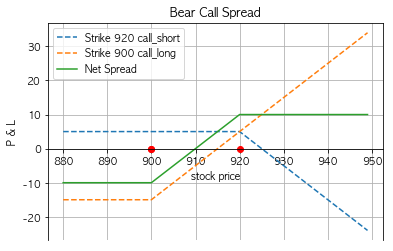

In [7]:
st = np.arange(880, 950, 1)
total_payoff = np.zeros(st.shape)
fig, ax = plt.subplots()

# 콜옵션 매도
strike1 = 920 
premium= 5

payoff = short_call_payoff(st, strike1, premium)
plot_spread(st, payoff, strike1, fig, ax, 'Strike {} call_short'.format(strike1),'dashed')
total_payoff += payoff

# 더 낮은 행사가의 콜옵션 매수
strike2 = 900 
premium= 15

payoff = long_call_payoff(st, strike2, premium)
plot_spread(st, payoff, strike2, fig, ax, 'Strike {} call_long'.format(strike2),'dashed')
total_payoff += payoff

plot_spread(st, total_payoff, strike2, fig, ax, 'Net Spread','solid')

plt.title('Bear Call Spread');

# bear call spread (short call spread)

    when an options trader expects a decline in the price of the underlying asset. A bear call spread is achieved by purchasing call options at a specific strike price while also selling the same number of calls with the same expiration date, but at a lower strike price. The maximum profit to be gained using this strategy is equal to the credit received when initiating the trade.

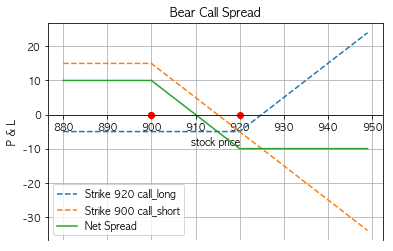

In [54]:
st = np.arange(880, 950, 1)
total_payoff = np.zeros(st.shape)
fig, ax = plt.subplots()

# Long call : 콜옵션 매수
strike1 = 920 
premium= 5

payoff = long_call_payoff(st, strike1, premium)
plot_spread(st, payoff, strike1, fig, ax, 'Strike {} call_long'.format(strike1),'dashed')
total_payoff += payoff

# Short call : 더 낮은 행사가의 콜옵션 매도
strike2 = 900 
premium= 15

payoff = short_call_payoff(st, strike2, premium)
plot_spread(st, payoff, strike2, fig, ax, 'Strike {} call_short'.format(strike2),'dashed')
total_payoff += payoff

plot_spread(st, total_payoff, strike2, fig, ax, 'Net Spread','solid')

plt.title('Bear Call Spread');

# bull put spread

    when the investor expects a moderate rise in the price of the underlying asset. This strategy is constructed by purchasing one put option while simultaneously writing another put option with a higher strike price. The combination results in the trader receiving a credit or income from the premium received. The goal of this strategy is realized when the price of the underlying moves or stays above the higher strike price.

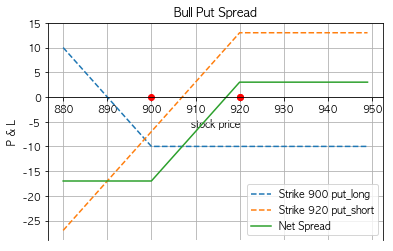

In [55]:
st = np.arange(880, 950, 1)
total_payoff = np.zeros(st.shape)
fig, ax = plt.subplots()

# Long put : 풋옵션 매수
strike1 = 900 
premium= 10

payoff = long_put_payoff(st, strike1, premium)
plot_spread(st, payoff, strike1, fig, ax, 'Strike {} put_long'.format(strike1),'--')
total_payoff += payoff

# Short call : 더 높은 행사가의 풋옵션 매도
strike2 = 920 
premium= 13

payoff = short_put_payoff(st, strike2, premium)
plot_spread(st, payoff, strike2, fig, ax, 'Strike {} put_short'.format(strike2),'--')
total_payoff += payoff

plot_spread(st, total_payoff, strike2, fig, ax, 'Net Spread','-')

plt.title('Bull Put Spread');

# Bear Put spread

Bear put spread 전략은 풋옵션을 매수하고 동시에 더 낮은 행사가의 풋옵션을 매도하여 성립된다.

전략의 목표는 주가의 작은 하락에서 이익을 얻는 것이다. 

In [57]:
# 현물 가격
spot_price = 900 

# Long call : 풋옵션 구입
strike_price_long_put = 880 
premium_long_put = 15

# Short call : 같은 만기일 더 낮은 행사가의 풋옵션 매도
strike_price_short_put = 860
premium_short_put = 10

print('Bear Put Spread 손익\n')
print('높은행사가의 풋 구입 :', strike_price_long_put)
print('낮은행사가의 풋 매도 :', strike_price_short_put)

Bear Put Spread 손익

높은행사가의 풋 구입 : 880
낮은행사가의 풋 매도 : 860


Max Profit : 15.0
Max Loss : -5.0


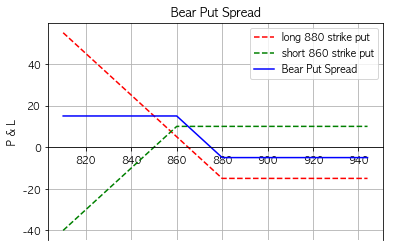

In [62]:
# Stock price range at expiration of the call
sT = np.arange(0.9*spot_price,1.05*spot_price,1) 

payoff_long_put = long_put_payoff(sT, strike_price_long_put, premium_long_put)
payoff_short_put = short_put_payoff(sT, strike_price_short_put, premium_short_put)
payoff_bear_put_spread = payoff_long_put + payoff_short_put

fig, ax = plt.subplots()
ax.spines["bottom"].set_position("zero")
ax.plot(sT, payoff_long_put, 'r--',
        label="long "+str(strike_price_long_put)+" strike put")

ax.plot(sT, payoff_short_put, 'g--', 
        label="short "+str(strike_price_short_put)+" strike put")

ax.plot(sT, payoff_bear_put_spread, 'b-', label="Bear Put Spread")
plt.grid(True)
plt.ylabel('P & L')
plt.legend()
print("Max Profit :", max(payoff_bear_put_spread))
print("Max Loss :", min(payoff_bear_put_spread))

plt.title('Bear Put Spread');

최대수익과 최대 손실이 모두 제한되며, 약간의 약세장이 예상될 때의 투자 전략.

# Protective Put

Protective Put 은 주식을 사고 동시에 풋옵션을 사는 것이다.

전략의 목표는 역방향의 주가 움직임에서 보호하는 것이다.

In [45]:
# A 종목 매수가
spot_price = 700 

# A 종목의 매수가와 동일한 strike price(ATM) 의 풋옵션 매수
strike_price_long_put = 700
premium_long_put = 20

print('Protective Put 손익\n')
print('주식 매수가 :', spot_price)
print('풋옵션 매수 :', strike_price_long_put)

Protective Put 손익

주식 매수가 : 700
풋옵션 매수 : 700


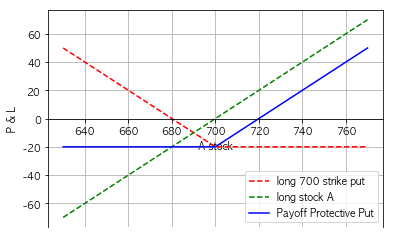

In [49]:
# 풋옵션 만기일의 주가 예상 범위
sT = np.arange(0.9*spot_price,1.1*spot_price,1) 

payoff_long_put = long_put_payoff(sT, strike_price_long_put, premium_long_put)
payoff_stock_A = sT - spot_price
payoff_protective_put = payoff_long_put + payoff_stock_A

fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(sT, payoff_long_put, 'r--', 
        label="long "+str(strike_price_long_put)+" strike put")
ax.plot(sT, payoff_stock_A, 'g--', label="long stock A")
ax.plot(sT, payoff_protective_put, 'b-', label="Payoff Protective Put")
plt.grid(True)
plt.legend()
plt.xlabel('A stock')
plt.ylabel('P & L');

주가가 700 아래로 떨어질 경우 최대 손실은 프리미엄 지불 가격인 20 으로 제한되고, 700 이상으로 오르면 가격 상승에 비례하여 수익은 커진다.

# Covered Call strategy

Covered call 은 주식을 매수하고 동시에 콜옵션을 매도하는 것이다.

이 전략은 주식이 오르지도 내리지도 않을 것 같을 때 사용한다. 

In [42]:
# A 종목 매수가
spot_price = 300 

# A 종목의 매수가와 동일한 strike price (ATM) 콜옵션 매도 
strike_price_short_call = 300
premium_short_call = 10

print('Covered Call 손익\n')
print('주식 매수가 :', spot_price)
print('콜옵션 매도 :', strike_price_short_call)

Covered Call 손익

주식 매수가 : 300
콜옵션 매도 : 300


Text(0,0.5,'P & L')

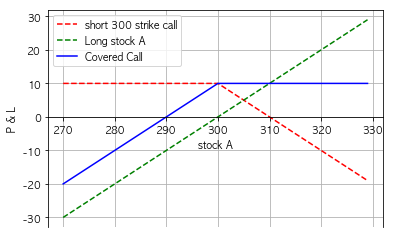

In [44]:
# Stock price range at expiration of the call
sT = np.arange(0.9*spot_price,1.1*spot_price,1) 

payoff_short_call = short_call_payoff(sT, strike_price_short_call, premium_short_call)
payoff_stock_A = sT - spot_price
payoff_covered_call = payoff_short_call + payoff_stock_A

fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(sT, payoff_short_call, 'r--', 
        label="short "+str(strike_price_short_call)+" strike call")
ax.plot(sT, payoff_stock_A, 'g--', label='Long stock A')
ax.plot(sT, payoff_covered_call, 'b-', label='Covered Call')
plt.legend()
plt.grid(True)
plt.xlabel('stock A')
plt.ylabel('P & L')

A 주가가 300 이상의 어느 가격이 되더라도 최대 수익은 옵션 프리미엄인 10 으로 제한되고 주가가 300 아래로 떨어지면 최대 손식은 가격 하락에 비례한다.

# Straddle

동일행사가, 동일만기의 put, call option 모두를 premium 지불하고 long position 취함.

주가가 strike price 보다 많이 변동하면 이익. 변하지 않으면 손실

In [28]:
## A 종목을 기초자산으로하는 strike price (ATM) 콜옵션 매수
strike_price_long_call = 292.5
premium_long_call = 18
long_call_contracts = 3

# A 종목을 기초자산으로하는 동일한 strike price (ATM) 풋옵션 매수
strike_price_long_put = 292.0
premium_long_put = 25
long_put_contracts = 3

# 만기일 주가
sT_expiry = [np.int(strike_price_long_call * 1.1), np.int(strike_price_long_call * 1.05), strike_price_long_call, 
             strike_price_long_put, np.int(strike_price_long_put * 0.95), np.int(strike_price_long_put * 0.9)]

print('Straddle 손익\n')
print('콜옵션 매수 :', strike_price_long_call)
print('풋옵션 매수 :', strike_price_long_put)

Straddle 손익

콜옵션 매수 : 292.5
풋옵션 매수 : 292.0


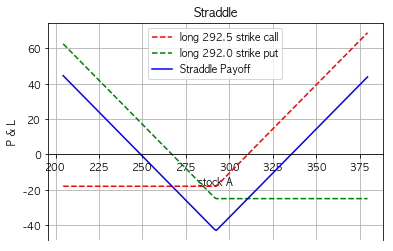

In [29]:
# Stock price range at expiration of the call
sT = np.arange(0.7*strike_price_long_put,1.3*strike_price_long_put,1) 

payoff_long_call = long_call_payoff(sT, strike_price_long_call, premium_long_call)
payoff_long_put = long_put_payoff(sT, strike_price_long_put, premium_long_put)
payoff_straddle = payoff_long_call + payoff_long_put

fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(sT,payoff_long_call, 'r--', 
        label="long "+str(strike_price_long_call)+" strike call")
ax.plot(sT,payoff_long_put, 'g--', 
        label="long "+str(strike_price_long_put)+" strike put")
ax.plot(sT, payoff_straddle , 'b-', label='Straddle Payoff')
plt.legend()
plt.grid(True)
plt.xlabel('stock A')
plt.ylabel('P & L')
plt.title('Straddle');

# Strangle

동일기초자산, 동일 만기의 서로 다른 행가가격의 call 과 put 을 position 으로 보유

## Long Strangle

In [37]:
# A 종목을 기초자산으로 하는 call option 매수
strike_price_long_call = 300
premium_long_call = 10

# A 종목을 기초자산으로하는 동일  만기의 풋옵션 매수
strike_price_long_put = 280
premium_long_put = 15

print('Long Strangle 손익\n')
print('콜옵션 매수 :', strike_price_long_call)
print('풋옵션 매수 :', strike_price_long_put)

Long Strangle 손익

콜옵션 매수 : 300
풋옵션 매수 : 280


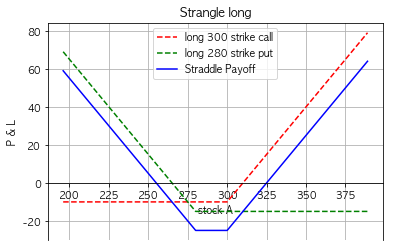

In [38]:
# Stock price range at expiration of the call
sT = np.arange(0.7*strike_price_long_put,1.3*strike_price_long_call,1) 

payoff_long_call = long_call_payoff(sT, strike_price_long_call, premium_long_call)
payoff_long_put = long_put_payoff(sT, strike_price_long_put, premium_long_put)
payoff_straddle = payoff_long_call + payoff_long_put

fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(sT,payoff_long_call, 'r--', 
        label="long "+str(strike_price_long_call)+" strike call")
ax.plot(sT,payoff_long_put, 'g--', 
        label="long "+str(strike_price_long_put)+" strike put")
ax.plot(sT, payoff_straddle , 'b-', label='Straddle Payoff')
plt.legend()
plt.grid(True)
plt.xlabel('stock A')
plt.ylabel('P & L')
plt.title('Strangle long');

## Short Strangle

만기시 주가가 call 행사가보다 낮고 put 행사가보다 높아야 한다. 예측이 빗나가면 손실은 무한대가 된다.

In [39]:
# A 종목을 기초자산으로 하는 call option 매도
strike_price_short_call = 300
premium_short_call = 10

# A 종목을 기초자산으로하는 동일  만기의 풋옵션 매도
strike_price_short_put = 280
premium_short_put = 15

print('Long Strangle 손익\n')
print('콜옵션 매수 :', strike_price_short_call)
print('풋옵션 매수 :', strike_price_short_put)

Long Strangle 손익

콜옵션 매수 : 300
풋옵션 매수 : 280


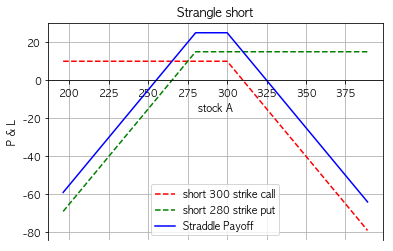

In [40]:
# Stock price range at expiration of the call
sT = np.arange(0.7*strike_price_short_put,1.3*strike_price_short_call,1) 

payoff_short_call = short_call_payoff(sT, strike_price_short_call, premium_short_call)
payoff_short_put = short_put_payoff(sT, strike_price_short_put, premium_short_put)
payoff_straddle = payoff_short_call + payoff_short_put

fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(sT,payoff_short_call, 'r--', 
        label="short "+str(strike_price_short_call)+" strike call")
ax.plot(sT,payoff_short_put, 'g--', 
        label="short "+str(strike_price_short_put)+" strike put")
ax.plot(sT, payoff_straddle , 'b-', label='Straddle Payoff')
plt.legend()
plt.grid(True)
plt.xlabel('stock A')
plt.ylabel('P & L')
plt.title('Strangle short');

# Butterfly Spread

4 개의 option 계약으로 구성됨. 동일한 만기일의 3 개의 다른 행사가로 구성.

2 개의 옵션 계약을 중간 행사가로 매도. 1 개의 옵션은 낮은 행사가로 매수. 1 개는 높은 행사가로 매수.

Put 과 Call 모두 사용할 수 있음. 이 전략은 기초자산의 가격이 현재 가격에서 많이 변하지 않을 것이라 예상할 때 실행함.

In [9]:
# A 종목을 기초자산으로 하는 call option 2 계약 매도
strike_price_short_call = 300
premium_short_call = 25

# A 종목을 기초자산으로하는 동일  만기, 낮은 strike 의 콜옵션 1 계약 매수
strike_price_long_call_1 = 260
premium_long_call_1 = 40

# A 종목을 기초자산으로하는 동일  만기, 높은 strike 의 콜옵션 1 계약 매수
strike_price_long_call_2 = 340
premium_long_call_2 = 30

total_premium_recieve = premium_short_call * 2 - premium_long_call_1 - premium_long_call_2

print('Long Strangle 손익\n')
print('콜옵션 2 계약 매도 :', strike_price_short_call)
print('콜옵션 매수 :', strike_price_long_call_1)
print('콜옵션 매수 :', strike_price_long_call_2)
print()
print('Total premium received : ', total_premium_recieve)

Long Strangle 손익

콜옵션 2 계약 매도 : 300
콜옵션 매수 : 260
콜옵션 매수 : 340

Total premium received :  -20


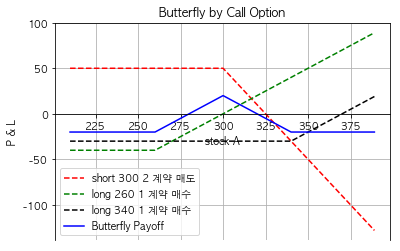

In [17]:
# Stock price range at expiration of the call
sT = np.arange(0.7*strike_price_short_call,1.3*strike_price_short_call, 1) 

payoff_short_call = short_call_payoff(sT, strike_price_short_call, premium_short_call, contracts=2)
payoff_long_call_1 = long_call_payoff(sT, strike_price_long_call_1, premium_long_call_1)
payoff_long_call_2 = long_call_payoff(sT, strike_price_long_call_2, premium_long_call_2)
payoff_butterfly = payoff_short_call + payoff_long_call_1 + payoff_long_call_2

fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(sT,payoff_short_call, 'r--', 
        label="short "+str(strike_price_short_call)+" 2 계약 매도")
ax.plot(sT,payoff_long_call_1, 'g--', 
        label="long "+str(strike_price_long_call_1)+" 1 계약 매수")
ax.plot(sT,payoff_long_call_2, 'k--', 
        label="long "+str(strike_price_long_call_2)+" 1 계약 매수")
ax.plot(sT, payoff_butterfly , 'b-', label='Butterfly Payoff')
plt.legend()
plt.grid(True)
plt.xlabel('stock A')
plt.ylabel('P & L')
plt.title('Butterfly by Call Option');

In [14]:
# A 종목을 기초자산으로 하는 put option 2 계약 매도
strike_price_short_put = 300
premium_short_put = 25

# A 종목을 기초자산으로하는 동일  만기, 낮은 strike 의 풋옵션 1 계약 매수
strike_price_long_put_1 = 260
premium_long_put_1 = 40

# A 종목을 기초자산으로하는 동일  만기, 높은 strike 의 풋옵션 1 계약 매수
strike_price_long_put_2 = 340
premium_long_put_2 = 30

total_premium_recieve = premium_short_put * 2 - premium_long_put_1 - premium_long_put_2

print('Long Strangle 손익\n')
print('콜옵션 2 계약 매도 :', strike_price_short_put)
print('콜옵션 매수 :', strike_price_long_put_1)
print('콜옵션 매수 :', strike_price_long_put_2)
print()
print('Total premium received : ', total_premium_recieve)

Long Strangle 손익

콜옵션 2 계약 매도 : 300
콜옵션 매수 : 260
콜옵션 매수 : 340

Total premium received :  -20


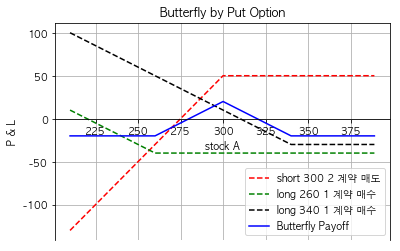

In [16]:
# Stock price range at expiration of the call
sT = np.arange(0.7*strike_price_short_put,1.3*strike_price_short_put, 1) 

payoff_short_put = short_put_payoff(sT, strike_price_short_call, premium_short_call, contracts=2)
payoff_long_put_1 = long_put_payoff(sT, strike_price_long_call_1, premium_long_call_1)
payoff_long_put_2 = long_put_payoff(sT, strike_price_long_call_2, premium_long_call_2)
payoff_butterfly = payoff_short_call + payoff_long_call_1 + payoff_long_call_2

fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(sT,payoff_short_put, 'r--', 
        label="short "+str(strike_price_short_put)+" 2 계약 매도")
ax.plot(sT,payoff_long_put_1, 'g--', 
        label="long "+str(strike_price_long_put_1)+" 1 계약 매수")
ax.plot(sT,payoff_long_put_2, 'k--', 
        label="long "+str(strike_price_long_put_2)+" 1 계약 매수")
ax.plot(sT, payoff_butterfly , 'b-', label='Butterfly Payoff')
plt.legend()
plt.grid(True)
plt.xlabel('stock A')
plt.ylabel('P & L')
plt.title('Butterfly by Put Option');

# Strip

만기일과 행가가격이 같은 콜옵션 1 개와 풋옵션 2 개를 매입

주가가 큰 폭으로 변할 것으로 예상되며 그 방향은 **약세** 일 가능성이 높다고 판단

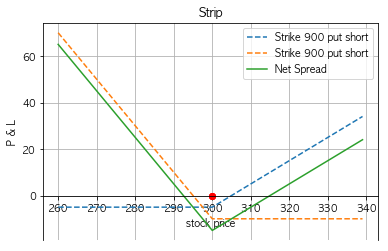

In [75]:
st = np.arange(260, 340, 1)
total_payoff = np.zeros(st.shape)
fig, ax = plt.subplots()

strike = 300
premium = 5

payoff = long_call_payoff(st, strike, premium,contracts=1)
plot_spread(st, payoff, strike, fig, ax, 'Strike {} put short'.format(strike1),'dashed')
total_payoff += payoff

payoff = long_put_payoff(st, strike, premium,contracts=2)
plot_spread(st, payoff, strike, fig, ax, 'Strike {} put short'.format(strike1),'dashed')
total_payoff += payoff

plot_spread(st, total_payoff, strike, fig, ax, 'Net Spread','solid')
plt.title("Strip");

# Strap

만기일과 행가가격이 같은 콜옵션 2 개와 풋옵션 1 개를 매입

주가가 큰 폭으로 변할 것으로 예상되며 그 방향은 **강세** 일 가능성이 높다고 판단

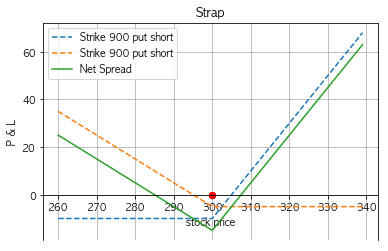

In [76]:
st = np.arange(260, 340, 1)
total_payoff = np.zeros(st.shape)
fig, ax = plt.subplots()

strike = 300
premium = 5

payoff = long_call_payoff(st, strike, premium,contracts=2)
plot_spread(st, payoff, strike, fig, ax, 'Strike {} put short'.format(strike1),'dashed')
total_payoff += payoff

payoff = long_put_payoff(st, strike, premium,contracts=1)
plot_spread(st, payoff, strike, fig, ax, 'Strike {} put short'.format(strike1),'dashed')
total_payoff += payoff

plot_spread(st, total_payoff, strike, fig, ax, 'Net Spread','solid')
plt.title('Strap')
plt.show()

# Collar

동일만기의 높은 행사가 콜옵션 1 개 매도, 낮은 행사가 풋옵션 1 개 매입

기초자산 (주식) 과 결합하여 범위선도계약 (주식 1 주 매입, 칼라 매입)을 구성하여 손익의 범위를 결정할 수 있음.

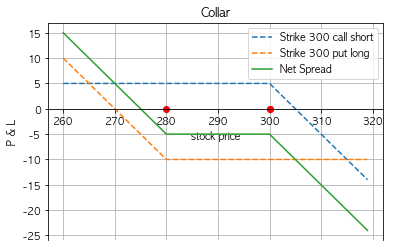

In [88]:
# 순수 칼라
st = np.arange(260, 320, 1)
total_payoff = np.zeros(st.shape)
fig, ax = plt.subplots()

strike1 = 300  # 높은 행사가의 콜옵션 1 개 매도
premium1 = 5

payoff = short_call_payoff(st, strike1, premium1, contracts=1)
plot_spread(st, payoff, strike1, fig, ax, 'Strike {} call short'.format(strike1),'dashed')
total_payoff += payoff

strike2 = 280  # 낮은 행사가의 풋옵션 1 개 매수
premium2 = 10

payoff = long_put_payoff(st, strike2, premium2, contracts=1)
plot_spread(st, payoff, strike2, fig, ax, 'Strike {} put long'.format(strike1),'dashed')
total_payoff += payoff

plot_spread(st, total_payoff, strike1, fig, ax, 'Net Spread','solid')
plt.title('Collar')
plt.show()

### 범위선도계약 (Range Forward)

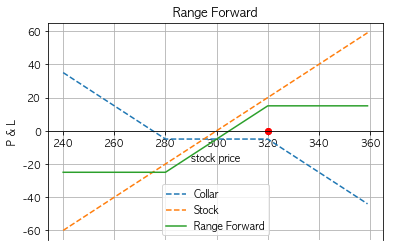

In [108]:
st = np.arange(240, 360, 1)
total_payoff = np.zeros(st.shape)
fig, ax = plt.subplots()

spot_price = 300

# 주식 1 주 매수 - 범위선도계약 구성
strike1 = 320  # 높은 행사가의 콜옵션 1 개 매도
premium1 = 10

payoff = short_call_payoff(st, strike1, premium1, contracts=1)
total_payoff += payoff

strike2 = 280  # 낮은 행사가의 풋옵션 1 개 매수
premium2 = 15

payoff = long_put_payoff(st, strike2, premium2, contracts=1)
total_payoff += payoff

plot_spread(st, total_payoff, strike1, fig, ax, 'Collar','dashed')

payoff = st - spot_price
plt.plot(st, payoff,'--', label='Stock')
total_payoff += payoff

plot_spread(st, total_payoff, strike1, fig, ax, 'Range Forward','solid')

plt.title('Range Forward')
plt.show()